In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:/Users/THANGAVEL/Desktop/houses_to_rent.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [11]:
all_cols = df.columns
all_cols

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [13]:
df.describe().round(3)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000,10692.000,10692.000,10692.000,10692.000,10692.000,10692.000,10692.000,10692.000
mean,149.218,2.506,2.237,1.609,1174.022,3896.247,366.704,53.301,5490.487
std,537.017,1.171,1.407,1.590,15592.305,3408.546,3107.832,47.768,16484.726
min,11.000,1.000,1.000,0.000,0.000,450.000,0.000,3.000,499.000
25%,56.000,2.000,1.000,0.000,170.000,1530.000,38.000,21.000,2061.750
50%,90.000,2.000,2.000,1.000,560.000,2661.000,125.000,36.000,3581.500
75%,182.000,3.000,3.000,2.000,1237.500,5000.000,375.000,68.000,6768.000
max,46335.000,13.000,10.000,12.000,1117000.000,45000.000,313700.000,677.000,1120000.000


In [28]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
df.columns = cols

In [33]:
#change "$" for use queries
df.rename(columns={'hoa_(R$)' : 'hoa',
'rent_amount_(R$)' : 'rent_amount',
'property_tax_(R$)' : 'property_tax',
'fire_insurance_(R$)' : 'fire_insurance',
'total_(R$)' : 'total'}, inplace = True)

In [34]:
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

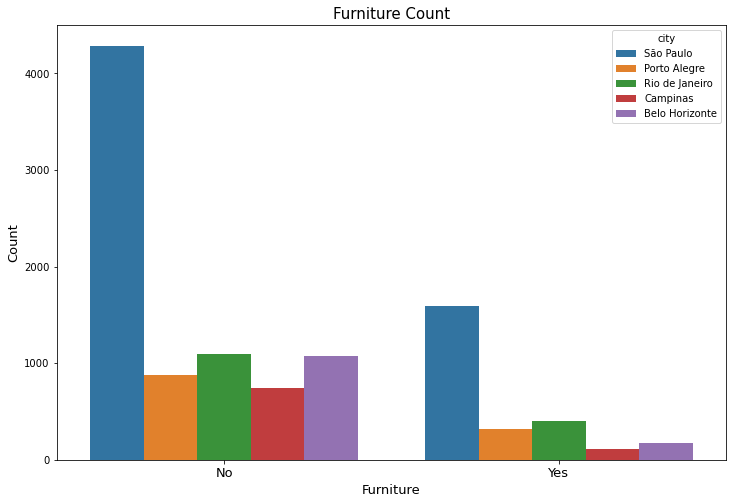

In [79]:
#count plot for furniture
fc = sns.countplot(df['furniture'], hue = df['city'])
fc.figure.set_size_inches(12, 8)
fc.set_title('Furniture Count',fontsize=15)
fc.set_xlabel('Furniture',fontsize=13)
fc.set_ylabel('Count', fontsize=13)
fc.set_xticklabels(['No','Yes'], fontsize=13)

Text(0, 0.5, 'Area Size')

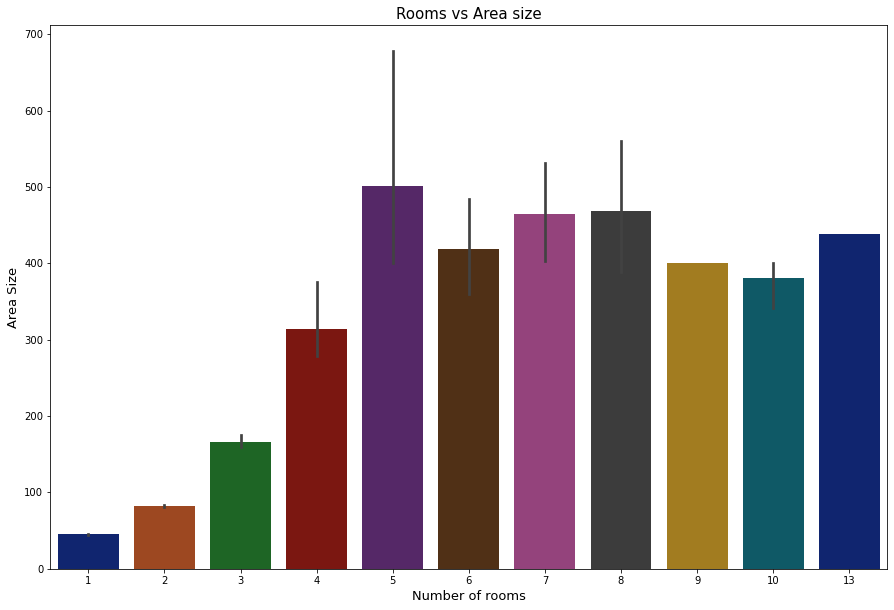

In [80]:
#barplot for number of rooms with size of area
bs = sns.barplot(x='rooms', y='area', data = df, palette = 'dark')
bs.figure.set_size_inches(15, 10)
bs.set_title('Rooms vs Area size',fontsize=15)
bs.set_xlabel('Number of rooms', fontsize=13)
bs.set_ylabel('Area Size', fontsize=13)

Text(0, 0.5, 'HOA Tax (R$)')

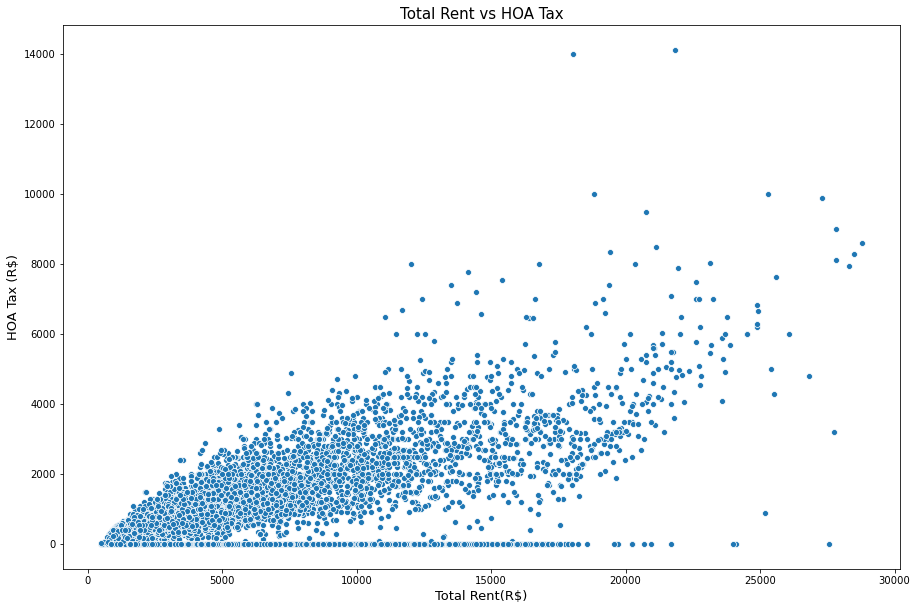

In [81]:
#scatter plot for Total Rent vs HOA Tax
df = df.drop(labels=df[(df['hoa'] > 300000)].index)
df = df.drop(labels=df[(df['total'] > 30000)].index)
th = sns.scatterplot(x = 'total', y = 'hoa', data = df)
th.figure.set_size_inches(15, 10)
th.set_title('Total Rent vs HOA Tax',fontsize=15)
th.set_xlabel('Total Rent(R$)', fontsize=13)
th.set_ylabel('HOA Tax (R$)', fontsize=13)

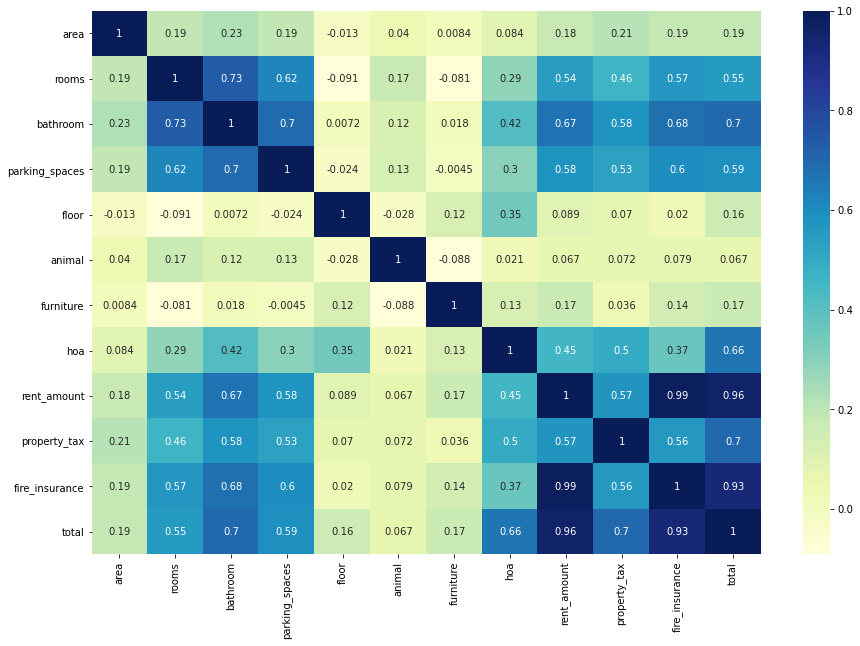

In [98]:
#heat map to find better correlated values for total rent
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu')

In [99]:
#batrooms, hoa property_tax, fire_insurance were more correlated with rent_amount
req_cols = cor[cor.loc['rent_amount']>0.5].T.columns
req_cols

Index(['rooms', 'bathroom', 'parking_spaces', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

In [100]:
df.drop(inplace = True,labels=df[(df['floor'] == 301)].index)

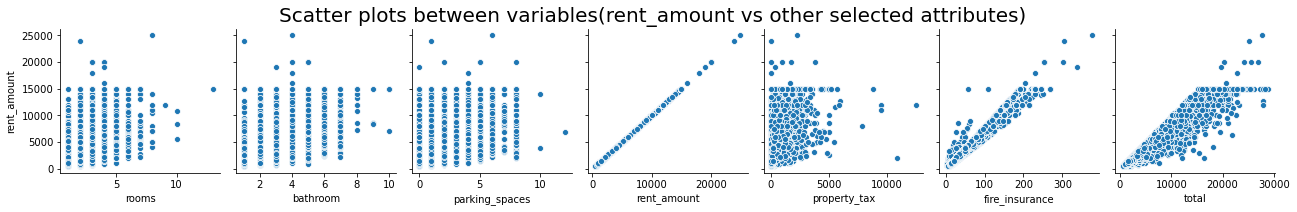

In [102]:
#pairplot for rent_amount with req_cols
ax = sns.pairplot(df, y_vars='rent_amount', x_vars=req_cols)
ax.fig.suptitle('Scatter plots between variables(rent_amount vs other selected attributes)', fontsize=20, y=1.1)
ax

In [117]:
#selecting x and y values
metrics = []
y = df['rent_amount']
x = df[req_cols]

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
#Splitting into training and test data usig train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)

In [120]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test) 

In [122]:
#add a constant and looking the summary
import statsmodels.api as sm 
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())
#looking the metrics
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.984e+31
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:03:03   Log-Likelihood:             1.7544e+05
No. Observations:                7474   AIC:                        -3.509e+05
Df Residuals:                    7466   BIC:                        -3.508e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.421e-13   4.48e-13     -0.